In [43]:
# Random Forest Classifier

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the datasets

datasets = pd.read_csv('Social_Network_Ads.csv')
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values



In [44]:
datasets.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

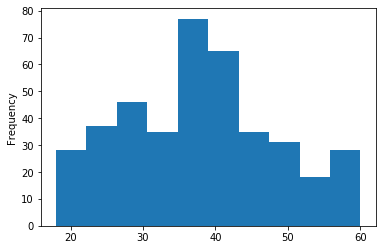

In [45]:
datasets.Age.plot(kind='hist')

In [46]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [47]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [48]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X_Train,Y_Train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
from sklearn.model_selection import cross_val_score


In [27]:
#K-fold cross-validation
kcv=cross_val_score(classifier,X_Train,Y_Train,cv=10,n_jobs=-1)


In [28]:
kcv

array([0.83870968, 0.86666667, 0.76666667, 0.93333333, 0.83333333,
       0.8       , 0.96666667, 0.9       , 1.        , 0.96551724])

In [9]:
cv.mean()

0.8870893585465331

In [16]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [13]:
params={'bootstrap': [True, False],\
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],\
 'max_features': ['auto', 'sqrt'],\
 'min_samples_leaf': [1, 2, 4],\
 'min_samples_split': [2, 5, 10],\
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [30]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator =classifier, param_distributions = random_grid, n_iter = 100, cv =10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_Train,Y_Train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   59.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.0min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='entropy',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=200,
                                                    n_jobs=Non

In [31]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 110,
 'bootstrap': False}

In [32]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                       max_depth=110, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
rf_random.best_score_

0.9033333333333333

In [36]:
models=[]
models.append(('rf',classifier))

rf: 0.342846 (0.060703)


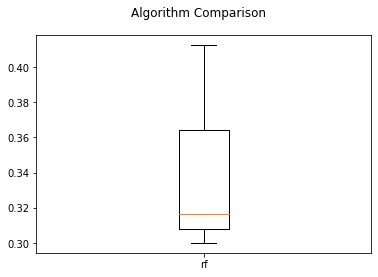

In [40]:

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = sklearn.model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = sklearn.model_selection.cross_val_score(model,X_Train,Y_Train,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [51]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor


In [55]:
KNN=KNeighborsRegressor(n_neighbors=5,weights='distance')
DT=DecisionTreeRegressor(max_depth=4,min_samples_leaf=7,random_state=0)
RF=RandomForestRegressor(n_estimators=100,random_state=0)
AB_RF=AdaBoostRegressor(base_estimator=RF,n_estimators=50,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=800)
stacked = VotingRegressor(estimators = [('GBoost',GBoost),('Boost_RF', AB_RF)])


In [56]:
models = []
models.append(('KNNRegressor',KNN))
models.append(('DT_Regressor',DT))
models.append(('RF_Regressor',RF))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoostRegressor',GBoost))
models.append(('VotingRegressor',stacked))

KNNRegressor: 0.315267 (0.082827)
DT_Regressor: 0.301698 (0.091109)
RF_Regressor: 0.316962 (0.084666)
AdaBoostRF: 0.342326 (0.068277)
GradientBoostRegressor: 0.388616 (0.062394)
VotingRegressor: 0.357132 (0.066298)


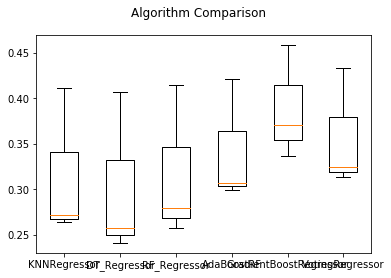

In [57]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_Train, Y_Train,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [5]:
Y_Pred = classifier.predict(X_Test)

In [6]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix,f1_score
cm = confusion_matrix(Y_Test, Y_Pred)

In [14]:
cm

array([[64,  4],
       [ 4, 28]], dtype=int64)

In [23]:
accuracy_score(Y_Test, Y_Pred)

0.92

In [21]:
from sklearn.metrics import classification_report 
classification_report(Y_Test, Y_Pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.94      0.94        68\n           1       0.88      0.88      0.88        32\n\n    accuracy                           0.92       100\n   macro avg       0.91      0.91      0.91       100\nweighted avg       0.92      0.92      0.92       100\n'

In [38]:
f1_score(Y_Test, Y_Pred)

0.875

In [39]:
f1_score(Y_Test, Y_pred)

0.8923076923076922

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [26]:
classifier2.fit(X_Train, Y_Train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [27]:
Y_pred = classifier2.predict(X_Test)


In [28]:
classification_report(Y_Test, Y_pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.94      0.95        68\n           1       0.88      0.91      0.89        32\n\n    accuracy                           0.93       100\n   macro avg       0.92      0.92      0.92       100\nweighted avg       0.93      0.93      0.93       100\n'

In [29]:
accuracy_score(Y_Test, Y_pred)

0.93

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


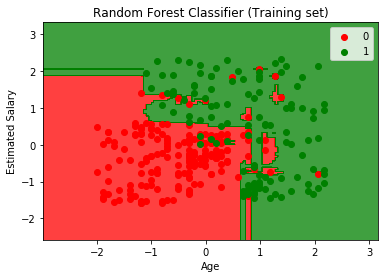

In [9]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


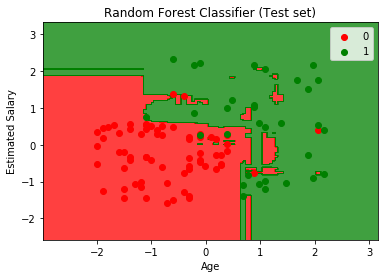

In [10]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()